<h1> Context </h1>
Context:
Starbucks is an American coffeehouse chain founded in Seattle. It offers both beverages and food.

Content:
This dataset contains the nutritional information of the food and drink items offered by Starbucks. All nutritional information for beverages corresponds to a 12 oz serving (approximately a 33 cl soda can).

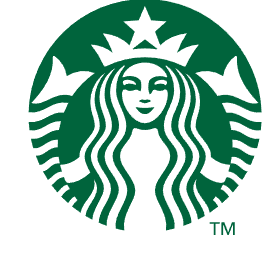


<h1> Steps to Follow </h1>

<b> Importing the Data </b>

Use genfromtxt to import the data from the file starbucks-menu-nutrition-drinks.csv. Be sure to specify a data type as well as an encoding to correctly load the textual data.
Tip: If you get a 'b' prefix on each value, you can try using the data type None to resolve the issue.

<b> Data Cleaning </b>

Missing values are denoted by "-". Replace these with null values (nan).

We will separate the different types of data. "header" will contain the column headers, "drinks" the drink names, and "data" the numerical values (make sure to set the appropriate type for this array).

Some drinks have no numerical data. Using np.isnan(...).all(...), calculate the proportion of drinks with no data.

Filter the "drinks" and "data" arrays to keep only the drinks that have data.

<b> Data Analysis </b>

Compute the average calories per drink.

Compute the median of the protein values.

Compute the maximum and minimum of the fat values.

Identify the drink with the highest calories (drink name + calorie count).

Identify the drink with the lowest calories (drink name + calorie count).

<b> Data Modeling </b>

To simplify the reading and analysis of drinks, we want to create a “NutriScore” that quickly indicates a drink’s calorie level:

0 to 100 calories: level 1

100 to 200 calories: level 2

200 to 300 calories: level 3

300 and above: level 4

Instructions:

Isolate the calories column into the variable calories.

Using np.zeros, create an array of the same shape as calories in the variable niveaux_calories.

Apply a series of filters to replace the values in niveaux_calories with 1, 2, 3, or 4, depending on each drink’s calorie level.

Once done, use the niveaux_calories array to filter for the lowest-calorie drinks (NutriScore 1).

Calculate the average calories for the drinks with NutriScore 1.

<h1> Importing the Data </h1>

In [272]:
import numpy as np

file = np.genfromtxt('starbucks-menu-nutrition-drinks.csv', delimiter = ',', dtype =None, encoding ="utf-8-sig")
print(file)

[['Drink' 'Calories' 'Fat (g)' ... 'Fiber (g)' 'Protein' 'Sodium']
 ['Cool Lime Starbucks Refreshers Beverage' '45' '0' ... '0' '0' '10']
 ['Ombré Pink Drink' '-' '-' ... '-' '-' '-']
 ...
 ['Ginger Ale' '-' '-' ... '-' '-' '-']
 ['Lemon Ale' '-' '-' ... '-' '-' '-']
 ['Orange Cream Soda' '-' '-' ... '-' '-' '-']]


<h1> Data Cleaning </h1>

<b> Separation of Textual Values and Numerical Values </b>

In [274]:
FileNaN = np.where(file == '-', np.nan, file)
print(FileNaN )

[['Drink' 'Calories' 'Fat (g)' ... 'Fiber (g)' 'Protein' 'Sodium']
 ['Cool Lime Starbucks Refreshers Beverage' '45' '0' ... '0' '0' '10']
 ['Ombré Pink Drink' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ...
 ['Ginger Ale' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['Lemon Ale' 'nan' 'nan' ... 'nan' 'nan' 'nan']
 ['Orange Cream Soda' 'nan' 'nan' ... 'nan' 'nan' 'nan']]


In [276]:
header = FileNaN[0]
#print(header)
drinks = FileNaN[1:,0]
#print(drinks)
data = FileNaN[1:,1:].astype(np.float64)
print(data)

[[45.  0. 11.  0.  0. 10.]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 ...
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]
 [nan nan nan nan nan nan]]


<b> Removal of Rows Without Numerical Values </b>

In [280]:
drinksNaN = np.isnan(data).all(axis=1)
sumdrinks = np.sum(drinksNaN)
WithoutValues = sumdrinks/ len(drinks)
print(f" the percentage of drinks without values is: {int(WithoutValues*100)}%.")

 the percentage of drinks without values is: 48%.


In [282]:
mask = ~np.isnan(data).all(axis=1)
updata = data[mask]
drinksup = drinks[mask]
print(drinksup)
print(updata)

['Cool Lime Starbucks Refreshers Beverage'
 'Strawberry Acai Starbucks Refreshers Beverage'
 'Very Berry Hibiscus Starbucks Refreshers Beverage'
 'Evolution Fresh Organic Ginger Limeade' 'Iced Coffee'
 'Iced Espresso Classics - Vanilla Latte'
 'Iced Espresso Classics - Caffe Mocha'
 'Iced Espresso Classics - Caramel Macchiato' 'Shaken Sweet Tea'
 'Tazo Bottled Berry Blossom White' 'Tazo Bottled Black Mango'
 'Tazo Bottled Black with Lemon' 'Tazo Bottled Brambleberry'
 'Tazo Bottled Giant Peach' 'Tazo Bottled Iced Passion'
 'Tazo Bottled Lemon Ginger' 'Tazo Bottled Organic Black Lemonade'
 'Tazo Bottled Organic Iced Black Tea'
 'Tazo Bottled Organic Iced Green Tea' 'Tazo Bottled Plum Pomegranate'
 'Tazo Bottled Tazoberry' 'Tazo Bottled White Cranberry'
 'Teavana Shaken Iced Black Tea' 'Teavana Shaken Iced Black Tea Lemonade'
 'Teavana Shaken Iced Green Tea' 'Teavana Shaken Iced Green Tea Lemonade'
 'Teavana Shaken Iced Passion Tango Tea'
 'Teavana Shaken Iced Passion Tango Tea Lemonade'

<h1> Data Analysis </h1>

In [148]:
meanCalori = np.mean(updata[:,0])
print(meanCalori)

135.16304347826087


In [190]:
mediaprotein = np.median(updata[:,-2])
print(mediaprotein)

1.0


In [288]:
maxLi = np.max(updata[:,1])
minLi =np.min(updata[:,1])
#print(maxLi, minLi)
maxCa = np.max(updata[:,0])
minCa = np.min(updata[:,0])
indicemaxC =np.argmax(updata[:,0])
indiceminC =np.argmin(updata[:,0])
print(f"The maximun amount of calories for '{drinksup[indicemaxC]}', is : {maxCa}.")
print(f"The minimum amount of calories for '{drinksup[indiceminC]}', is : {minCa}.")

The maximun amount of calories for 'Starbucks Signature Hot Chocolate', is : 430.0.
The minimum amount of calories for 'Iced Coffee', is : 0.0.


<h1> Creation of a New Column Indicating the Calorie Level </h1>

In [290]:
calories = updata[:,0].astype(float)
calories

array([ 45.,  80.,  60., 110.,   0., 130., 140., 130.,  80.,  60., 150.,
       140., 140., 150.,  70., 120., 140.,  60., 120., 140., 150., 140.,
        30.,  70.,  30.,  70.,  30.,  90.,  60., 130., 140., 130.,  90.,
        90., 210., 200.,  60.,  50.,  10.,  60., 150., 140., 140., 150.,
        70., 120., 140.,  60., 120., 140., 150., 140.,   5.,  10.,   5.,
         5.,   5.,   5.,   0.,   5.,  70.,   5., 110., 320., 430., 190.,
       290., 120., 250., 260., 250., 180., 130., 230., 250., 200., 260.,
       190., 300., 190., 190.,  45., 250., 360., 350., 110., 280., 140.,
       200., 200., 320., 300.])

In [294]:
calories_lev = np.zeros(calories.shape, dtype=int)
calories_lev

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [296]:
calories_lev[(calories>=0)& (calories<= 100)]=1
calories_lev[(calories>100)& (calories<= 200)]=2
calories_lev[(calories>200)& (calories<= 300)]=3
calories_lev[calories>300]=4
calories_lev

array([1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 2,
       3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 3, 4, 4, 2, 3, 2,
       2, 2, 4, 3])

In [300]:
mask2 = calories_lev <=1
mask2

array([ True,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False])

In [302]:
drinksup[mask2]

array(['Cool Lime Starbucks Refreshers Beverage',
       'Strawberry Acai Starbucks Refreshers Beverage',
       'Very Berry Hibiscus Starbucks Refreshers Beverage', 'Iced Coffee',
       'Shaken Sweet Tea', 'Tazo Bottled Berry Blossom White',
       'Tazo Bottled Iced Passion', 'Tazo Bottled Organic Iced Black Tea',
       'Teavana Shaken Iced Black Tea',
       'Teavana Shaken Iced Black Tea Lemonade',
       'Teavana Shaken Iced Green Tea',
       'Teavana Shaken Iced Green Tea Lemonade',
       'Teavana Shaken Iced Passion Tango Tea',
       'Teavana Shaken Iced Passion Tango Tea Lemonade',
       'Teavana Shaken Iced Peach Green Tea',
       'Starbucks Refreshers Raspberry Pomegranate',
       'Starbucks Refreshers Strawberry Lemonade',
       'Starbucks Iced Coffee Caramel',
       'Starbucks Iced Coffee Light Sweetened',
       'Starbucks Iced Coffee Unsweetened',
       'Tazo Bottled Berry Blossom White', 'Tazo Bottled Iced Passion',
       'Tazo Bottled Organic Iced Black Tea'

In [304]:
np.mean(updata[calories_lev <=1,:])


10.333333333333334